# Geospace Packages in Resen
This tutorial is a brief introduction to the some of the packages included in Resen that are particularly useful for geospace research.  Many of these packages have been developed by members of the geospace community to help users access data, models, and toolkits.  These packages can be very powerful and often included functionality to do a wide variety of things.  Rather than attempt to cover every feature of every package in Resen, this tutorial will introduce the general purpose and useage of each package and direct you to resources from the package developers for full documentation of the funcitonality.  Where possible, code snipits have been provided, preferably from the developers' documentation and examples.

**Disclaimer:** Resen aims to provide these packages correctly installed and configured for immediate use, however individual packages may still contain bugs which the Resen developers in general do not track.  If you encounter a bug in one of the packages included in Resen, please report it to the package developers!

## Table of Contents
- [AACGMv2](#aacgmv2)
- [Apexpy](#apexpy)
- [Basemap](#basemap)
- [Bokeh](#bokeh)
- [Cartopy](#cartopy)
- [h5py](#h5py)
- [Ipython](#ipython)
- [MadrigalWeb](#madrigalweb)
- [Mangopy](#mangopy)
- [Matplotlib](#matplotlib)
- [NetCDF4](#netcdf4)
- [NumPy](#numpy)
- [Pandas](#pandas)
- [Plasmapy](#plasmapy)
- [pyDARN](#pydarn)
- [Pyglow](#pyglow)
- [pyephem](#pyephem)
- [pymap3d](#pymap3d)
- [PyMongo](#pymongo)
- [SciPy](#scipy)
- [Sciunit](#sciunit)
- [Seaborn](#seaborn)
- [Skyfield](#skyfield)
- [SpacePy](#spacepy)
- [Sunpy](#sunpy)
- [SQLAlchemy](#sqlalchemy)
- [SymPy](#sympy)
- [PyTables](#pytables)
- [viresclient](#viresclient)
- [visuamisr](#visuamisr)

<a id='aacgmv2'></a>
## AACGMv2
AACGMv2 is a python wrapper for the AACGM-v2 C library which allows converting between geographic and altitude‐adjusted corrected geomagnetic coordinates.

#### Resources
[Documentation](https://aacgmv2.readthedocs.io/en/latest/)  
[Source Code](https://github.com/aburrell/aacgmv2)  
**Citation:** Shepherd, S. G. (2014), Altitude‐adjusted corrected geomagnetic coordinates: Definition and functional approximations, Journal of Geophysical Research: Space Physics, 119, 7501–7521, doi:10.1002/2014JA020264.

In [2]:
import aacgmv2
import datetime as dt
import numpy as np

# geo to AACGM, single numbers
dtime = dt.datetime(2013, 11, 3)
mlat, mlon, mlt = aacgmv2.get_aacgm_coord(60, 15, 300, dtime)
print('MLAT = ', mlat)
print('MLON = ', mlon)
print('MLT = ', mlt)

# AACGM to geo, mix arrays/numbers
glat, glon, alt = aacgmv2.convert_latlon_arr([90, -90], 0, 0, dtime, method_code="A2G")
print('GLAT = ', glat)
print('GLON = ', glon)
print('ALT = ', alt)

# MLT to AACGM
mlon = aacgmv2.convert_mlt([1.4822189, 12], dtime, m2a=True)
print('MLON = ', mlon)


MLAT =  57.4735789050811
MLON =  93.6111336025403
MLT =  1.4816105858694968
GLAT =  [ 82.96859922 -74.33899667]
GLON =  [-84.65010944 125.84759847]
ALT =  [14.12457922 12.87721946]
MLON =  [93.62025831449785, -108.61302518550218]


<a id='apexpy'></a>
## Apexpy
Apexpy is python wrapper for the Apex fortran library, which allows for converting between geodetic and magnetic apex coordinates.  The Apex fortran library uses a spherical harmonics fit to IGRF, so coordinate conversions can be performed quickly without field-line tracing.

#### Resources
[Documentation](https://apexpy.readthedocs.io/en/latest/index.html)  
[Source Code](https://github.com/aburrell/apexpy)

In [3]:
from __future__ import print_function
from apexpy import Apex
A = Apex(date=2015.3)  # datetime objects are also supported

# geo to apex, scalar input
mlat, mlon = A.convert(60, 15, 'geo', 'apex', height=300)
# print("MLAT = {:.12f}, MLON = {:.12f}".format(mlat, mlon))
print('MLAT = ', mlat)
print('MLON = ', mlon)

# apex to geo, array input
glat, glon = A.convert([90, -90], 0, 'apex', 'geo', height=0)
print('GLAT = ', glat)
print('GLON = ', glon)

# geo to MLT
import datetime as dt
mlat, mlt = A.convert(60, 15, 'geo', 'mlt', datetime=dt.datetime(2015, 2, 10, 18, 0, 0))
print('MLAT = ', mlat)
print('MLT = ', mlt)

# can also convert magnetic longitude to mlt
mlt = A.mlon2mlt(120, dt.datetime(2015, 2, 10, 18, 0, 0))
print('MLT = ', mlt)

MLAT =  57.469573974609375
MLON =  93.63358306884766
GLAT =  [ 83.09959412 -74.38826752]
GLON =  [-84.59458923 125.71492767]
MLAT =  56.590423583984375
MLT =  19.108103879292806
MLT =  20.89354750315348


<a id='basemap'></a>
## Basemap
The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python.  Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to one of 25 different map projections (using the PROJ.4 C library). Matplotlib is then used to plot contours, images, vectors, lines or points in the transformed coordinates. Shoreline, river and political boundary datasets (from Generic Mapping Tools) are provided, along with methods for plotting them. The GEOS library is used internally to clip the coastline and polticial boundary features to the desired map projection region.

**Note:** Basemap is being replaced with cartopy and will be depricated by 2020.  Whenever possible, use the [cartopy](#cartopy) package rather than basemap.

#### Resources
[Documentation](https://matplotlib.org/basemap/)  
[Tutorials](https://basemaptutorial.readthedocs.io/en/latest/)  
[Source Code](https://github.com/matplotlib/basemap)  

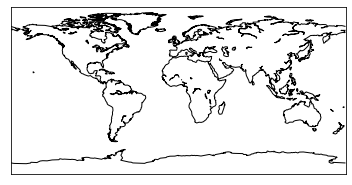

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

map = Basemap()
map.drawcoastlines()
plt.show()

<a id='bokeh'></a>
## Bokeh
Bokeh is an interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of versatile graphics, and to extend this capability with high-performance interactivity over very large or streaming datasets. 

#### Resources
[Documentation](https://bokeh.pydata.org/en/latest/)  
[Gallery](https://bokeh.pydata.org/en/latest/docs/gallery.html#gallery)  
[Source Code](https://github.com/bokeh/bokeh)

In [5]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
output_notebook()

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend_label="Temp.", line_width=2)

# show the results
show(p)

Loading BokehJS ...

<a id='cartopy'></a>
## Cartopy
Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.  Cartopy makes use of the powerful PROJ.4, NumPy and Shapely libraries and includes a programmatic interface built on top of Matplotlib for the creation of publication quality maps.

#### Resources
[Documentation](https://scitools.org.uk/cartopy/docs/latest/)  
[Gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html)  
[Source Code](https://github.com/SciTools/cartopy)  
**Citation:** Cartopy. v0.11.2. 22-Aug-2014. Met Office. Exeter, Devon, UK. https://github.com/SciTools/cartopy/archive/v0.11.2.tar.gz

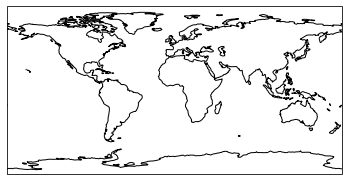

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

<a id='h5py'></a>
## h5py
The h5py package is a Pythonic interface to the [HDF5](https://www.hdfgroup.org/solutions/hdf5/) binary data format.  It lets you store huge amounts of numerical data, and easily manipulate that data from NumPy. HDF5 files are an increasingly common way to store scientific data and metadata, especially when data sets are large, complex, or multidimentional

**Note:** Both [h5py](#h5py) and [PyTables](#pytables) are standard packges for working with the hdf5 data format.  Please refer to the [FAQs](http://docs.h5py.org/en/stable/faq.html#what-s-the-difference-between-h5py-and-pytables) for information on how and why they differ.

#### Resources
[Documentation](http://docs.h5py.org/en/stable/index.html)  
[Source Code](https://github.com/h5py/h5py)  
**Citation:** A. Collette, Python and HDF5, O'Reilly (2014) (http://shop.oreilly.com/product/0636920030249.do)

In [7]:
import h5py
import numpy as np

# create a hdf5 file
with h5py.File("/home/jovyan/work/test.h5", "w") as f:
    f.create_group('groupA')
    f.create_dataset('groupA/zeros', data=np.zeros(10))
    f.create_dataset('groupA/ones', data=np.ones(10))

    f.create_group('groupB')
    f.create_dataset('groupB/array1', data=np.arange(0.,100.,1.))
    f.create_dataset('groupB/array2', data=np.arange(0.,200.,2.))
    
# read the hdf5 file
with h5py.File("/home/jovyan/work/test.h5", "r") as f:
    zero_array = f['groupA/zeros'][:]
    array1 = f['groupB/array1'][:10]
    
print(zero_array, array1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


<a id='ipython'></a>
## Ipython
[IPython](https://ipython.org/) provides a rich architecture for interactive computing with:
- A powerful interactive shell.
- A kernel for Jupyter.
- Support for interactive data visualization and use of GUI toolkits.
- Flexible, embeddable interpreters to load into your own projects.
- Easy to use, high performance tools for parallel computing.

#### Resources
[Documentation](https://ipython.readthedocs.io/en/stable/)  
[Gallery](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)  
[Source Code](https://github.com/ipython/ipython)  
**Citation:** Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: https://ipython.org

<a id='madrigalweb'></a>
## MadrigalWeb
MadrigalWeb is a package that lets you write scripts to interact with the CEDAR Madrigal Database.  It lets you query the database, discover which data are available, and download data files. 

#### Resources
[Documentation](http://cedar.openmadrigal.org/docs/name/rr_python.html)  
[Examples](http://cedar.openmadrigal.org/docs/name/rt_python.html)

In [8]:
import madrigalWeb.madrigalWeb

# constants
user_fullname = 'Bill Rideout - automated test'
user_email = 'brideout@haystack.mit.edu'
user_affiliation = 'MIT Haystack'

madrigalUrl = 'http://millstonehill.haystack.mit.edu/'
testData = madrigalWeb.madrigalWeb.MadrigalData(madrigalUrl)

print('Example of call to getAllInstruments')
instList = testData.getAllInstruments()
# print out Millstone
for inst in instList:
    if inst.code == 30:
        print(str(inst) + '\n')
        

print('Example of call to getExperiments')
expList = testData.getExperiments(30, 1998,1,19,0,0,0,1998,1,22,0,0,0)
for exp in expList:
    # should be only one
    print(str(exp) + '\n')


print('Example of call to getExperimentFiles')
fileList = testData.getExperimentFiles(expList[0].id)
for thisFile in fileList:
    if thisFile.category == 1:
        print(str(thisFile.name) + '\n')
        thisFilename = thisFile.name
        break
    
print('Example of downloadFile - simple and hdf5 formats:')
result = testData.downloadFile(thisFilename, "/home/jovyan/work/test.txt", user_fullname, user_email, user_affiliation, "simple")
result = testData.downloadFile(thisFilename, "/home/jovyan/work/test.hdf5", user_fullname, user_email, user_affiliation, "hdf5")

print('Example of simplePrint - only first 1000 characters printed')
result = testData.simplePrint(thisFilename, user_fullname, user_email, user_affiliation)
print(result[:1000], '\n')

print('Example of call to getExperimentFileParameters - only first 10 printed')
fileParms = testData.getExperimentFileParameters(thisFilename)
for i in range(10):
    print(fileParms[i])

print('Example of call to isprint (prints data)')
result = testData.isprint(thisFilename, 'gdalt,ti', 'filter=gdalt,500,600 filter=ti,1900,2000', user_fullname, user_email, user_affiliation)
print(result)

print('Example of call to madCalculator (gets derived data at any time)')
result = testData.madCalculator(1999,2,15,12,30,0,45,55,5,-170,-150,10,200,200,0,'sdwht,kp')
for line in result:
    for value in line:
        print('%8.2e ' % (value))

print('Example of searching all Madrigal sites for an experiment - here we search for PFISR data')
expList = testData.getExperiments(61,2008,4,1,0,0,0,2008,4,30,0,0,0,local=0)
print(expList[0])

print('Since this experiment is not local (note the experiment id = -1), we need to create a new MadrigalData object to get it')
testData2 = madrigalWeb.madrigalWeb.MadrigalData(expList[0].madrigalUrl)

print('Now repeat the same calls as above to get PFISR data from the SRI site')
expList2 = testData2.getExperiments(61,2008,4,1,0,0,0,2008,4,30,0,0,0,local=1)
print('This is a PFISR experiment')
print(expList2[0])

Example of call to getAllInstruments
name: Millstone Hill IS Radar
code: 30
mnemonic: mlh
latitude: 42.619
longitude: 288.51
altitude: 0.146
category: Incoherent Scatter Radars


Example of call to getExperiments
id: 10000802
realUrl: http://millstonehill.haystack.mit.edu/showExperiment/?experiment_list=10000802
url: http://millstonehill.haystack.mit.edu/madtoc/experiments/1998/mlh/20jan98
name: World Day - Storm El Scan
siteid: 1
sitename: Millstone
instcode: 30
instname: Millstone Hill IS Radar
startyear: 1998
startmonth: 1
startday: 20
starthour: 13
startmin: 52
startsec: 43
endyear: 1998
endmonth: 1
endday: 21
endhour: 16
endmin: 38
endsec: 33
isLocal: True
madrigalUrl: http://millstonehill.haystack.mit.edu/
PI: Phil Erickson
PIEmail: perickson@haystack.mit.edu
uttimestamp: 1564668973
access: 0
Madrigal version: 3.1


Example of call to getExperimentFiles
/opt/millstone/experiments/1998/mlh/20jan98/mlh980120g.002.hdf5

Example of downloadFile - simple and hdf5 formats:
Example of s

<a id='mangopy'></a>
## Mangopy
Mangopy is a package for acessing and visualizing ASI data from the MANGO (Midlatitude Allsky-imaging Network for GeoSpace Observations) Network.  [MANGO](http://mango.sri.com/en/) consists of several red-line imagers throughout the contental United States.

#### Resources
[Source Code](https://github.com/astib/MANGO)  
[Tutorial](https://github.com/astib/MANGO/blob/master/mangopy_tutorial.ipynb)

No data directory has been specified!  If data is downloaded, it will be saved to /tmp/MANGOData.  This is also where mangopy will look for existing data files.


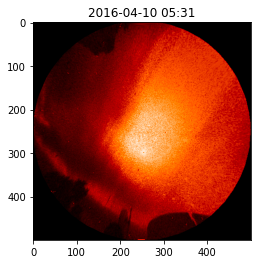

In [9]:
from mangopy import Mango

man = Mango()

site = man.get_site_info('Capitol Reef Field Station')
import datetime as dt
time0 = dt.datetime(2016,4,10,5,30)
man.plot(site,time0)

<a id='matplotlib'></a>
## Matplotlib
Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

#### Resources
[Documentation](https://matplotlib.org/)  
[Gallery](https://matplotlib.org/gallery/index.html)  
[Source Code](https://github.com/matplotlib/matplotlib)

**Citation:** J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.

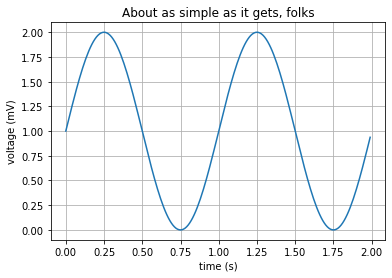

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()


<a id='netcdf4'></a>
## NetCDF4
Netcdf4-python is a Python interface to the netCDF C library.  [NetCDF](https://www.unidata.ucar.edu/software/netcdf/docs/netcdf_introduction.html) is a common file format typically used for storing large, multi-dimensional arrays of scientific data.

#### Resources
[Documentation](https://unidata.github.io/netcdf4-python/netCDF4/index.html)  
[Source Code](https://github.com/Unidata/netcdf4-python)

In [11]:
from netCDF4 import Dataset
import numpy

# first create a netcdf file
with Dataset("/home/jovyan/work/test.nc", "w", format="NETCDF4") as rootgrp:
    fcstgrp = rootgrp.createGroup("forecasts")
    analgrp = rootgrp.createGroup("analyses")

    # create dimensions
    lat = rootgrp.createDimension("lat", 73)
    lon = rootgrp.createDimension("lon", 144)

    # create variable
    latitudes = rootgrp.createVariable("forecasts/lat","f4",("lat",))
    longitudes = rootgrp.createVariable("forecasts/lon","f4",("lon",))

    # put data in variable
    latitudes[:] = numpy.arange(-90,91,2.5)
    longitudes[:] = numpy.arange(-180,180,2.5)


# now read the netcdf file
with Dataset("/home/jovyan/work/test.nc") as ds:
    print(ds.dimensions.keys())
    lats = ds["forecasts/lat"][:]
    lons = ds["forecasts/lon"][:]

print(lats, lons)


dict_keys(['lat', 'lon'])
[-90.  -87.5 -85.  -82.5 -80.  -77.5 -75.  -72.5 -70.  -67.5 -65.  -62.5
 -60.  -57.5 -55.  -52.5 -50.  -47.5 -45.  -42.5 -40.  -37.5 -35.  -32.5
 -30.  -27.5 -25.  -22.5 -20.  -17.5 -15.  -12.5 -10.   -7.5  -5.   -2.5
   0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5
  60.   62.5  65.   67.5  70.   72.5  75.   77.5  80.   82.5  85.   87.5
  90. ] [-180.  -177.5 -175.  -172.5 -170.  -167.5 -165.  -162.5 -160.  -157.5
 -155.  -152.5 -150.  -147.5 -145.  -142.5 -140.  -137.5 -135.  -132.5
 -130.  -127.5 -125.  -122.5 -120.  -117.5 -115.  -112.5 -110.  -107.5
 -105.  -102.5 -100.   -97.5  -95.   -92.5  -90.   -87.5  -85.   -82.5
  -80.   -77.5  -75.   -72.5  -70.   -67.5  -65.   -62.5  -60.   -57.5
  -55.   -52.5  -50.   -47.5  -45.   -42.5  -40.   -37.5  -35.   -32.5
  -30.   -27.5  -25.   -22.5  -20.   -17.5  -15.   -12.5  -10.    -7.5
   -5.    -2.5    0.     2.5   

<a id='numpy'></a>
## NumPy
NumPy is the fundamental package for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities
Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

**Note:** The numpy library is powerful, extensive, and well documented.  Rather than attempting to read the full documentation before you get started with numpy, it may be easier to find exactly what you're looking for through search engines as you need it!

#### Resources
[Documentation](https://numpy.org/devdocs/)  
[Quickstart Tutorial](https://numpy.org/devdocs/user/quickstart.html)  
[Source Code](https://github.com/numpy/numpy)  
**Citation:** Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37

In [12]:
import numpy as np

a = np.arange(15).reshape(3, 5)
print(a)
print(a.shape)
print(a.ndim)
print(a.dtype.name)
print(a.itemsize)
print(a.size)
print(type(a))


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
(3, 5)
2
int64
8
15
<class 'numpy.ndarray'>


<a id='pandas'></a>
## Pandas
[Pandas (Python Data Analysis Library)](https://pandas.pydata.org/) provides high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

#### Resources
[Documentation](https://pandas.pydata.org/pandas-docs/stable/)  
[Tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)  
[Source Code](https://github.com/pandas-dev/pandas)

In [13]:
import numpy as np
import pandas as pd

# Create a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

# Create a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6)
print(dates)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)

# Create a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'})
print(df2)

# View different aspects of the DataFrame
print(df.head())
print(df.index)
print(df.columns)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01 -0.295524  0.466186  1.173951  0.524448
2013-01-02 -0.438308 -1.064235 -1.381640 -0.196577
2013-01-03 -1.840227  0.447152 -0.062186 -1.184478
2013-01-04  0.228336  1.181517  0.406785 -1.831165
2013-01-05  1.997049  0.147233  1.277606  0.883457
2013-01-06 -1.219971 -0.611764  0.095845  0.701355
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
                   A         B         C         D
2013-01-01 -0.295524  0.466186  1.173951  0.524448
2013-01-02 -0.438308 -1.064235 -1.381640 -0.196577
2013-01-03 -1.840227  0.447152 -0.062186 -1.184478
2013-01-04  0.228

<a id='plasmapy'></a>
## Plamsmapy
[Plasmapy](https://www.plasmapy.org/) is a collection of software commonly used and shared between plasma physicists and researchers globally.  It contains functionality useful for plasma physics.

#### Resources
[Documentation](https://plasmapy.readthedocs.io/en/latest/)  
[Source Code](https://github.com/PlasmaPy/PlasmaPy)  
[Tutorials](https://github.com/PlasmaPy/PlasmaPy-Tutorials)  
**Citation:** PlasmaPy Community, Nicholas A. Murphy, Andrew J. Leonard, Dominik Stańczak, Pawel M. Kozlowski, Samuel J. Langendorf, Colby C. Haggerty, Jasper P. Beckers, Stuart J. Mumford, Tulasi N. Parashar, and Yi-Min Huang. (2018, April). PlasmaPy: an open source community-developed Python package for plasma physics. Zenodo. http://doi.org/10.5281/zenodo.1238132

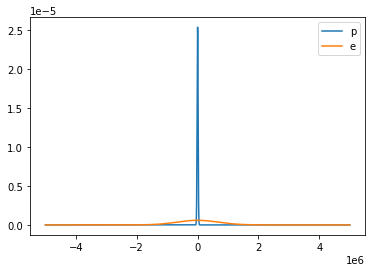

In [14]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.constants import (m_e, k_B)

from plasmapy.formulary import Maxwellian_1D

# plot 1D Maxwellian
T = 3e4 * u.K
dv = 10 * u.m / u.s
v = np.arange(-5e6, 5e6, 10) * u.m / u.s

for particle in ['p', 'e']:
    pdf = Maxwellian_1D(v, T=T, particle=particle)
    integral = (pdf).sum() * dv
    plt.plot(v, pdf, label=particle)
plt.legend()

<a id='pydarn'></a>
## pyDARN
pyDARN is a python data visualization library for the Super Dual Auroral Radar Network (SuperDARN).  It includes functionality to open/read SuperDARN data files and produce basic plots.  PyDARN is intended to replace the most important functionality of the now-depricated DaViTpy.

#### Resources
[Documentation](https://pydarn.readthedocs.io/en/master/)  
[Source Code](https://github.com/SuperDARN/pydarn)  
**Citation:** Schmidt, M.T., Detwiller, M.H., Billet, D.D., Bland, E. C., Burrell, A. G., Kotyk, K., Peters, D. GO., Reimer, A. S., Sterne, K. T., and Thomas, E. G. (2020). pyDARN, v1.0.0, January 2020.

<a id='pyglow'></a>
## Pyglow
pyglow is a Python module that wraps several upper atmosphere climatological models written in FORTRAN, such as the Horizontal Wind Model (HWM), the International Geomagnetic Reference Field (IGRF), the International Reference Ionosphere (IRI), and the Mass Spectrometer and Incoherent Scatter Radar (MSIS). Pyglow offers access to a variety of models and geophysical indices in a convenient, high-level object-oriented interface within Python.

**Note:** There is a known bug in pyglow which will crash the python kernel if IRI-2016 is run with a time on or after January 1, 2010.

#### Resources
[Examples](https://github.com/timduly4/pyglow/tree/master/examples)  
[Source Code](https://github.com/timduly4/pyglow)

Computing alt=100.0 km...
Computing alt=104.0 km...
Computing alt=108.0 km...
Computing alt=112.0 km...
Computing alt=116.0 km...
Computing alt=120.0 km...
Computing alt=124.0 km...
Computing alt=128.0 km...
Computing alt=132.0 km...
Computing alt=136.0 km...
Computing alt=140.0 km...
Computing alt=144.0 km...
Computing alt=148.0 km...
Computing alt=152.0 km...
Computing alt=156.0 km...
Computing alt=160.0 km...
Computing alt=164.0 km...
Computing alt=168.0 km...
Computing alt=172.0 km...
Computing alt=176.0 km...
Computing alt=180.0 km...
Computing alt=184.0 km...
Computing alt=188.0 km...
Computing alt=192.0 km...
Computing alt=196.0 km...
Computing alt=200.0 km...
Computing alt=204.0 km...
Computing alt=208.0 km...
Computing alt=212.0 km...
Computing alt=216.0 km...
Computing alt=220.0 km...
Computing alt=224.0 km...
Computing alt=228.0 km...
Computing alt=232.0 km...
Computing alt=236.0 km...
Computing alt=240.0 km...
Computing alt=244.0 km...
Computing alt=248.0 km...
Computing al

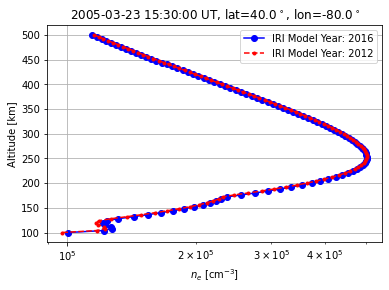

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

import pyglow

# Inputs:
lat = 40.
lon = -80.
alt = 250.
alts = np.linspace(100., 500., 101)
dn = datetime(2005, 3, 23, 15, 30)

ne_2012 = []
ne_2016 = []

# Calculate for both IRI model year 2012 and 2016:
for alt in alts:
    print("Computing alt=%3.1f km..." % (alt))
    pt = pyglow.Point(dn, lat, lon, alt)

    pt.run_iri()  # default year is 2016
    ne_2016.append(pt.ne)

    pt.run_iri(version=2012)  # Can revert back to 2012 model, if necessary.
    ne_2012.append(pt.ne)

# Plot
plt.figure(1)
plt.clf()
plt.semilogx(ne_2016, alts, 'bo-', label='IRI Model Year: 2016')
plt.semilogx(ne_2012, alts, 'r.--', label='IRI Model Year: 2012')
plt.grid()
plt.xlabel(r'$n_e$ [cm$^{-3}$]')
plt.ylabel('Altitude [km]')
plt.title(r'%s UT, lat=%3.1f$^\circ$, lon=%3.1f$^\circ$' %
          (dn.strftime('%Y-%m-%d %H:%M:%S'), lat, lon))
plt.legend(loc=0)
plt.draw()
plt.show()

<a id='pyephem'></a>
## PyEphem
PyEphem provides an ephem Python package for performing high-precision astronomy computations of planet, comet, asteroid, and Earth satellite positions. The underlying numeric routines are coded in C and are the same ones that drive the popular [XEphem](http://www.clearskyinstitute.com/xephem/) astronomy application, whose author, Elwood Charles Downey, generously gave permission for their use in PyEphem. The name ephem is short for the word ephemeris, which is the traditional term for a table giving the position of a planet, asteroid, or comet for a series of dates.  PyEphem can also compute the angular separation between two objects in the sky, determine the constellation in which an object lies, and find the times an object rises, transits, and sets.

**Note:** [Skyfield](#skyfield) should be preferred over PyEphem for new projects. Its modern design encourages better Python code, and uses NumPy to accelerate its calculations.

#### Resources
[Documentation](https://rhodesmill.org/pyephem/toc.html)  
[Source Code](https://github.com/brandon-rhodes/pyephem)


In [2]:
import ephem

# right ascension and declination of Mars at a particular time
mars = ephem.Mars()
mars.compute('2007/10/02 00:50:22')
print(mars.ra, mars.dec)

# azimuth and altitude of Mars from Boston at a particular time
boston = ephem.Observer()
boston.lat = '42.37'
boston.lon = '-71.03'
boston.date = '2007/10/02 00:50:22'
mars.compute(boston)
print(mars.az, mars.alt)

# next rising and transit of Mars from Boston
print(boston.next_rising(mars))
print(boston.next_transit(mars))


6:05:56.34 23:23:40.0
37:55:48.9 -14:23:11.8
2007/10/2 02:31:51
2007/10/2 10:07:47


<a id='pymap3d'></a>
## pymap3d
Pymap3d is a pure python coordinate conversion utility.  It can handle conversion between a variety of common non-magnetic coordinate systems.
- Geodetic
- Earth-centered Earth-fixed
- Earth-centered Inertial
- Azimuth, Elevation, Range
- East, North, Up
- North, East, Down

#### Resources
[Documentation](https://geospace-code.github.io/pymap3d/)  
[Source Code](https://github.com/geospace-code/pymap3d)  
[Examples](https://github.com/geospace-code/pymap3d/tree/master/examples)

In [3]:
import pymap3d as pm

lat = 66.0
lon = 135.0
alt = 100000.
x,y,z = pm.geodetic2ecef(lat,lon,alt)
print(x, y, z)

observer_lat = 64.0
observer_lon = 130.0
az,el,rng = pm.geodetic2aer(lat, lon, alt, observer_lat, observer_lon, 0)
print(az, el, rng)


-1868298.4667779435 1868298.4667779438 5895302.103366037
44.36206117432795 15.548810833488648 341864.69668775954


<a id='pymongo'></a>
## PyMongo
PyMongo is a Python distribution containing tools for working with [MongoDB](https://www.mongodb.com/), and is the recommended way to work with MongoDB from Python.

#### Resources
[Documentation](https://api.mongodb.com/python/current/)  
[Tutorials](https://api.mongodb.com/python/current/tutorial.html)  
[Source Code](https://github.com/mongodb/mongo-python-driver)

<a id='scipy'></a>
## SciPy
The [SciPy library](https://www.scipy.org/scipylib/index.html) is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines such as routines for numerical integration, interpolation, optimization, linear algebra and statistics.

#### Resources
[Documentation](https://docs.scipy.org/doc/scipy/reference/)  
[Tutorials](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html)  
[Source Code](https://github.com/scipy/scipy/)

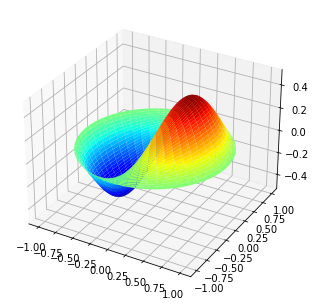

In [4]:
from scipy import special
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def drumhead_height(n, k, distance, angle, t):
    kth_zero = special.jn_zeros(n, k)[-1]
    return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)

theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'))


<a id='sciunit'></a>
## Sciunit
Sciunits are efficient, lightweight, self-contained packages of computational experiments that can be guaranteed to repeat or reproduce regardless of deployment issues. Sciunit answers the call for a reusable research object that containerizes and stores applications simply and efficiently, facilitates sharing and collaboration, and eases the task of executing, understanding, and building on shared work. 

#### Resources
[Documentation](https://sciunit.run/docs/)  
[Source Code](https://bitbucket.org/geotrust/sciunit2/src/master/)

<a id='seaborn'></a>
## Seaborn
[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.  Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.


#### Resources
[Documentation](https://seaborn.pydata.org/index.html)  
[Source Code](https://github.com/mwaskom/seaborn)  
[Tutorial](https://seaborn.pydata.org/tutorial.html)  
[Gallery](https://seaborn.pydata.org/examples/index.html#)  
**Citation:** Michael Waskom and the seaborn development team (2020), mwaskom/seaborn, Zenodo. doi:10.5281/zenodo.592845 

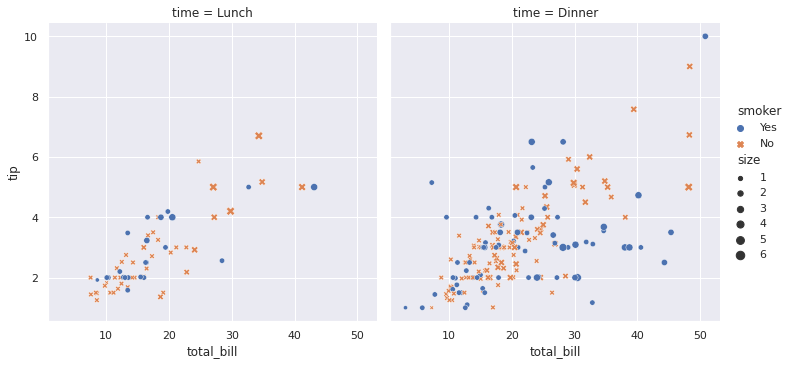

In [5]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

<a id='skyfield'></a>
## Skyfield
[Skyfield](https://rhodesmill.org/skyfield/) computes positions for the stars, planets, and satellites in orbit around the Earth. Its results should agree with the positions generated by the United States Naval Observatory and their Astronomical Almanac to within 0.0005 arcseconds (half a “mas” or milliarcsecond).

#### Resources
[Documentation](https://rhodesmill.org/skyfield/toc.html)  
[Source Code](https://github.com/skyfielders/python-skyfield/)  
**Citation:** Rhodes, B., “Skyfield: High precision research-grade positions for planets and Earth satellites generator”, Astrophysics Source Code Library. 2019. ascl:1907.024 http://rhodesmill.org/skyfield/

In [6]:
from skyfield.api import load
from skyfield.api import Topos

# Compute the current position of Mars in the sky
planets = load('de421.bsp')
earth, mars = planets['earth'], planets['mars']

ts = load.timescale()
t = ts.now()
astrometric = earth.at(t).observe(mars)
ra, dec, distance = astrometric.radec()

print(ra)
print(dec)
print(distance)

# Can specify location on Earth in topocentric coordinates
boston = earth + Topos('42.3583 N', '71.0636 W')
astrometric = boston.at(t).observe(mars)
alt, az, d = astrometric.apparent().altaz()

print(alt)
print(az)

01h 47m 16.74s
+06deg 39' 59.9"
0.437855 au
-24deg 55' 58.9"
306deg 50' 53.5"


<a id='sgp4'></a>
## SGP4
SGP4 computes the position and velocity of an earth-orbiting satellite, given the satellite’s TLE orbital elements from a source like Celestrak. It implements the most recent version of SGP4, and is regularly run against the SGP4 test suite to make sure that its satellite position predictions agree to within 0.1 mm of the predictions of the standard C++ implementation of the algorithm. This error is far less than the 1–3 km/day by which satellites themselves deviate from the ideal orbits described in TLE files.

#### Resources
[Documentation](https://pypi.org/project/sgp4/)  
[Source Code](https://github.com/brandon-rhodes/python-sgp4)

In [7]:
from sgp4.earth_gravity import wgs72
from sgp4.io import twoline2rv

line1 = ('1 00005U 58002B   00179.78495062  .00000023  00000-0  28098-4 0  4753')
line2 = ('2 00005  34.2682 348.7242 1859667 331.7664  19.3264 10.82419157413667')

satellite = twoline2rv(line1, line2, wgs72)
position, velocity = satellite.propagate(2000, 6, 29, 12, 50, 19)

print(satellite.error)    # nonzero on error
print(satellite.error_message)
print(position)
print(velocity)

0
None
(5576.056952400577, -3999.371134576461, -1521.9571594376116)
(4.772627303379327, 5.119817120959581, 4.275553909172121)


<a id='spacepy'></a>
## SpacePy
SpacePy is a package for Python, targeted at the space sciences, that aims to make basic data analysis, modeling and visualization easier. It builds on the capabilities of the well-known NumPy and MatPlotLib packages. Publication quality output direct from analyses is emphasized among other goals:
- Quickly obtain data
- Create publications quality plots
- Perform complicated analysis easily
- Run common empirical models
- Change coordinates effortlessly
- Harness the power of Python

#### Resources
[Documentation](https://pythonhosted.org/SpacePy/#)  
[Tutorials](https://pythonhosted.org/SpacePy/quickstart.html)  
[Source Code](https://github.com/spacepy/spacepy)  
**Citation:** Morley, S. K., Koller, J., Welling, D. T., Larsen, B. A., Henderson, M.G., and Niehof, J. T. (2011). Spacepy - A Python-based library of tools for the space sciences. Proceedings of the 9th Python in science conference (SciPy 2010), Austin, TX, USA.

/home/jovyan/envs/py38/lib/python3.8/site-packages/spacepy/omni.py:376: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5.File(infile[dbase]) as hfile:


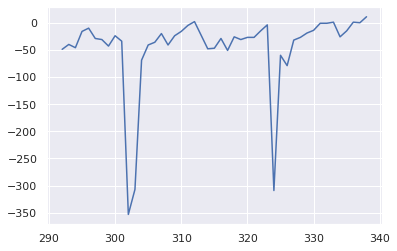

In [8]:
import spacepy.time as spt
import spacepy.omni as om
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

st = dt.datetime(2003,10,20)
en = dt.datetime(2003,12,5)
delta = dt.timedelta(days=1)
ticks = spt.tickrange(st, en, delta, 'UTC')
data = om.get_omni(ticks)

plt.plot(ticks.eDOY, data['Dst'])

<a id='sunpy'></a>
## Sunpy
[Sunpy](https://sunpy.org/) is an open-source Python library for Solar Physics data analysis and visualization. It aims to be a comprehensive data analysis environment that allows researchers within the field of solar physics to carry out their tasks with the minimal effort.  The SunPy project (also known as the Sunpy organization) wants to provide the software tools necessary so that anyone can analyze the ever increasing catalogue of solar data. This enables the targeted support of other solar physics Python packages that do not fall within the scope of the core SunPy package.

#### Resources
[Documentation](https://docs.sunpy.org/en/stable/)  
[Source Code](https://github.com/sunpy/sunpy)  
[Gallery](https://docs.sunpy.org/en/stable/generated/gallery/index.html)  
**Citation:** The SunPy Community, Barnes, W. T., Bobra, M. G., Christe, S. D., Freij, N., Hayes, L. A., Ireland, J., Mumford, S., Perez-Suarez, D., Ryan, D. F., Shih, A. Y., Chanda, P., Glogowski, K., Hewett, R., Hughitt, V. K., Hill, A., Hiware, K., Inglis, A., Kirk, M. S. F., Konge, S., Mason, J. P., Maloney, S. A., Murray, S. A., Panda, A., Park, J., Pereira, T. M. D., Reardon, K., Savage, S., Sipőcz, B. M., Stansby, D., Jain, Y., Taylor, G., Yadav, T., Rajul, and Dang, T. K. (2020), The SunPy Project: Open Source Development and Status of the Version 1.0 Core Package, The Astrophysical Journal, 890(1). doi:10.3847/1538-4357/ab4f7a

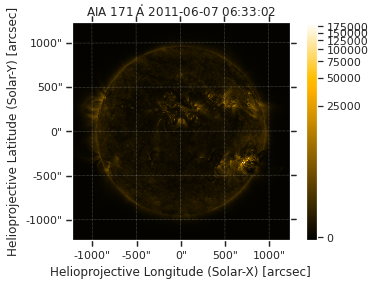

/usr/lib/python3.8/functools.py:874: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (7).

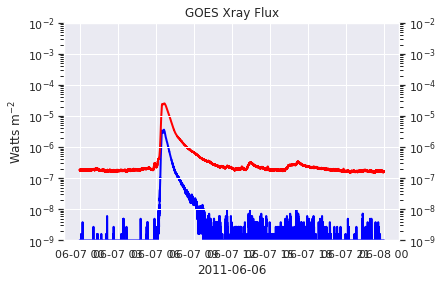

In [9]:
import sunpy.data.sample
import sunpy.map
import numpy as np
import sunpy.data.sample
import sunpy.timeseries as ts

# Look at a map
aia = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
aia.peek()

# and a time series
my_timeseries = ts.TimeSeries(sunpy.data.sample.GOES_XRS_TIMESERIES, source='XRS')
my_timeseries.peek()


<a id='sqlalchemy'></a>
## SQLAlchemy
[SQLAlchemy](https://www.sqlalchemy.org/) is the Python SQL toolkit and Object Relational Mapper that gives application developers the full power and flexibility of SQL.  It provides a full suite of well known enterprise-level persistence patterns, designed for efficient and high-performing database access, adapted into a simple and Pythonic domain language.

#### Resources
[Documentation](https://docs.sqlalchemy.org/en/13/)  
[Tutorials](https://www.sqlalchemy.org/library.html#tutorials)  
[Source Code](https://github.com/sqlalchemy/sqlalchemy)

<a id='sympy'></a>
## SymPy
[SymPy](https://www.sympy.org/en/index.html) is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible.

#### Resources
[Documentation](https://docs.sympy.org/latest/index.html)  
[Tutorial](http://certik.github.io/scipy-2013-tutorial/html/index.html)  
[Source Code](https://github.com/sympy/sympy)  
**Citation:** Meurer A, Smith CP, Paprocki M, Čertík O, Kirpichev SB, Rocklin M, Kumar A, Ivanov S, Moore JK, Singh S, Rathnayake T, Vig S, Granger BE, Muller RP, Bonazzi F, Gupta H, Vats S, Johansson F, Pedregosa F, Curry MJ, Terrel AR, Roučka Š, Saboo A, Fernando I, Kulal S, Cimrman R, Scopatz A. (2017) SymPy: symbolic computing in Python. PeerJ Computer Science 3:e103 https://doi.org/10.7717/peerj-cs.103

In [10]:
import sympy as sym

x, y, z = sym.symbols("x y z")
expr = sym.cos(x) + 1
print(expr.subs(x, y))

expr.subs(x, 0)
expr = x**y
print(expr)

expr = expr.subs(y, x**y)
print(expr)

expr = expr.subs(y, x**x)
print(expr)

/home/jovyan/envs/py38/lib/python3.8/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cos(y) + 1
x**y
x**(x**y)
x**(x**(x**x))


<a id='pytables'></a>
## PyTables
PyTables is a package for managing hierarchical datasets and designed to efficiently and easily cope with extremely large amounts of data. PyTables is built on top of the [HDF5](https://www.hdfgroup.org/solutions/hdf5/) library, using the Python language and the NumPy package. It features an object-oriented interface that, combined with C extensions for the performance-critical parts of the code (generated using Cython), makes it a fast, yet extremely easy to use tool for interactively browse, process and search very large amounts of data. One important feature of PyTables is that it optimizes memory and disk resources so that data takes much less space (specially if on-flight compression is used) than other solutions such as relational or object oriented databases.

**Note:** Both [PyTables](#pytables) and [h5py](#h5py) are standard packges for working with the hdf5 data format.  Please refer to the [FAQs](http://www.pytables.org/FAQ.html#how-does-pytables-compare-with-the-h5py-project) for information on how and why they differ.

#### Resources
[Documentation](https://www.pytables.org/index.html)  
[Tutorials](https://www.pytables.org/usersguide/tutorials.html)  
[Source Code](https://github.com/PyTables/PyTables)  
**Citation:** Alted, F., Vilata, I. and PyTables Developers Team (2002). PyTables: Hierarchical Datasets in Python. http://www.pytables.org


In [11]:
import tables
import numpy as np

# create a hdf5 file
with tables.open_file("/home/jovyan/work/test.h5", "w") as f:
    f.create_group('/', 'groupA')
    f.create_array('/groupA', 'zeros', np.zeros(10))
    f.create_array('/groupA', 'ones', np.ones(10))

    f.create_group('/', 'groupB')
    f.create_array('/groupB', 'array1', np.arange(0.,100.,1.))
    f.create_array('/groupB', 'array2', np.arange(0.,200.,2.))
    
# read the hdf5 file
with tables.open_file("/home/jovyan/work/test.h5", "r") as f:
    zero_array = f.get_node('/groupA/zeros')[:]
    array1 = f.get_node('/groupB/array1')[:10]
    
print(zero_array, array1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


/home/jovyan/envs/py38/lib/python3.8/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<a id='viresclient'></a>
## viresclient
viresclient is a Python package which connects to a VirES server through the WPS interface and handles product requests and downloads. This enables easy access to ESA’s Swarm mission data and models. Data and models are processed on demand on the server - a combination of measurements from any time interval can be accessed. These are the same data that can be accessed by the VirES GUI. viresclient handles the returned data to allow direct loading as a single pandas.DataFrame, or xarray.Dataset.

#### Resources
[Documentation](https://viresclient.readthedocs.io/en/latest/)  
[Source Code](https://github.com/ESA-VirES/VirES-Python-Client)  
[doi:10.5281/zenodo.3733320](https://doi.org/10.5281/zenodo.3733320)

In [12]:
from viresclient import SwarmRequest

# Set up connection with server
request = SwarmRequest()
# Set collection to use
# - See https://viresclient.readthedocs.io/en/latest/available_parameters.html
request.set_collection("SW_OPER_MAGA_LR_1B")
# Set mix of products to fetch:
#  measurements (variables from the given collection)
#  models (magnetic model predictions at spacecraft sampling points)
#  auxiliaries (variables available with any collection)
# Optionally set a sampling rate different from the original data
request.set_products(
    measurements=["F", "B_NEC"],
    models=["CHAOS-Core"],
    auxiliaries=["QDLat", "QDLon"],
    sampling_step="PT10S"
)
# Fetch data from a given time interval
# - Specify times as ISO-8601 strings or Python datetime
data = request.get_between(
    start_time="2014-01-01T00:00",
    end_time="2014-01-01T01:00"
)
# Load the data as an xarray.Dataset
ds = data.as_xarray()


/home/jovyan/envs/py38/lib/python3.8/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Token invalid.


Setting access token for https://vires.services/ows... Generate a token at https://vires.services/accounts/tokens/

KeyboardInterrupt: 

<a id='visuamisr'></a>
## visuamisr
visuamisr provides a basic data visualization tools for working with Advanced Modular Incoherent Scatter Radar (AMISR) data.  It can read in data from AMISR hdf5 files and create basic RIT, profile, and 3D beam plots.

#### Resouces
[Documentation](https://visuamisr.readthedocs.io/en/latest/)  
[Source Code](https://github.com/asreimer/visuamisr)